---
title: "Google Capstone Cyclistic Study"
author: "zainab"
date: "2022-12-01"
output:
  html_document: default
  pdf_document: default
  word_document: default

Note: This project is the Google Data Analytics Certification’s Capstone project
Data set: https://divvy-tripdata.s3.amazonaws.com/index.html
# Scenario
You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations.

# Characters and teams
* Cyclistic: A bike-share program that features more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about 8% of riders use the assistive options. Cyclistic users are more likely to ride for leisure, but about 30% use them to commute to work each day.
* Lily Moreno: The director of marketing and your manager. Moreno is responsible for the development of campaigns and initiatives to promote the bike-share program. These may include email, social media, and other channels.
* Cyclistic marketing analytics team: A team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy. You joined this team six months ago and have been busy learning about Cyclistic’s mission and business goals — as well as how you, as a junior data analyst, can help Cyclistic achieve them.
* Cyclistic executive team: The notoriously detail-oriented executive team will decide whether to approve the recommended marketing program.

# About the company
In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.
Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments.
One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers
who purchase annual memberships are Cyclistic members.
Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs.

Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why
casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are interested in analyzing the Cyclistic historical bike trip data to identify trends

# Ask

Three questions will guide the future marketing program:
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

Moreno has assigned you the first question to answer: How do annual members and casual riders use Cyclistic bikes
differently?

# Prepare
Download the previous 12 months of Cyclistic trip data
here. (The data has been made available by Motivate International Inc.) This is public data that you can use to explore how different customer types are using Cyclistic bikes. 

# Process

* Download the previous 12 months of Cyclistic trip data.
* Unzip the files.
* Create a folder on your desktop or Drive to house the files. Use appropriate file-naming conventions.
* Create subfolders for the .CSV file and the .XLS or Sheets file so that you have a copy of the original data. Move the downloaded files to the appropriate subfolder.
* Open each .CSV file in Google Sheets and save it to the appropriate subfolder.
* Checked for duplicates
* Checked data types
* Checked data for nulls
* Checked columns for consistent name
* Created a column called “ride_length” and calculated the length of each ride by subtracting the column “started_at” from the column “ended_at” and format as HH:MM:SS 
* Created a column called “day_of_week,” and calculated the day of the week that each ride started using the “WEEKDAY”command (for example, =WEEKDAY(C2,1)) in each file. 

# Analyze
* Calculated the mean of ride_length for each month
=average(e2:e359979)
* Calculated the max ride_length  by months
=max(e2:e359979)
* Calculated the mode of day_of_week by month 
=mode(e2:e359979)

# Pivot tables
* Calculated count of started hours by a pivot table with member-causal as rows, started hour as columns and count of started hour as values
* Calculated count of end hours by a  pivot table with member-causal as rows, ended hour as columns and count of ended hour as values 
* Calculated the average ride_length for members and casual riders with rows as member_casual and Values as Average of ride_length. 
* Calculate the average ride_length for users by day_of_week.Columns was set to day_of_week, rows was set to member_casual and Values was set to Average of ride_length. 
* Calculated the number of rides for users by day_of_week by adding Count of trip_id to Values.

Combined the monthly data into one table for overview
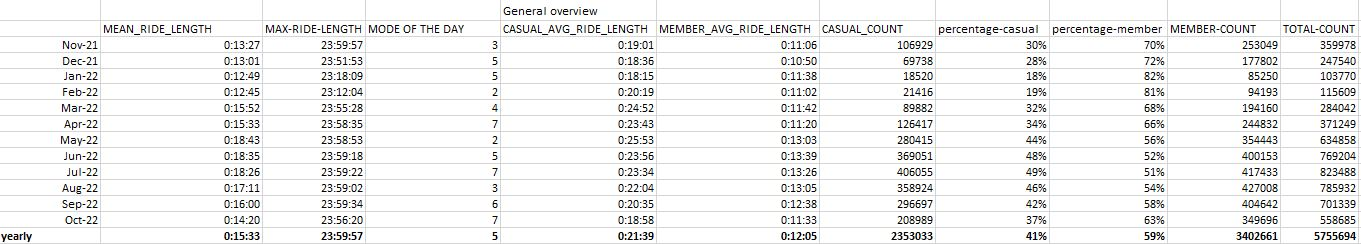

Calculated the start hours and end hours by number of hours after creating pivot table for each month and summarized the data into a table

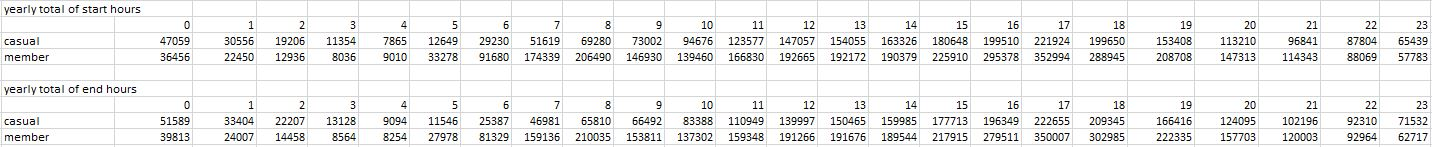

Calculated the weekly spread of casuals and members throughout each month.

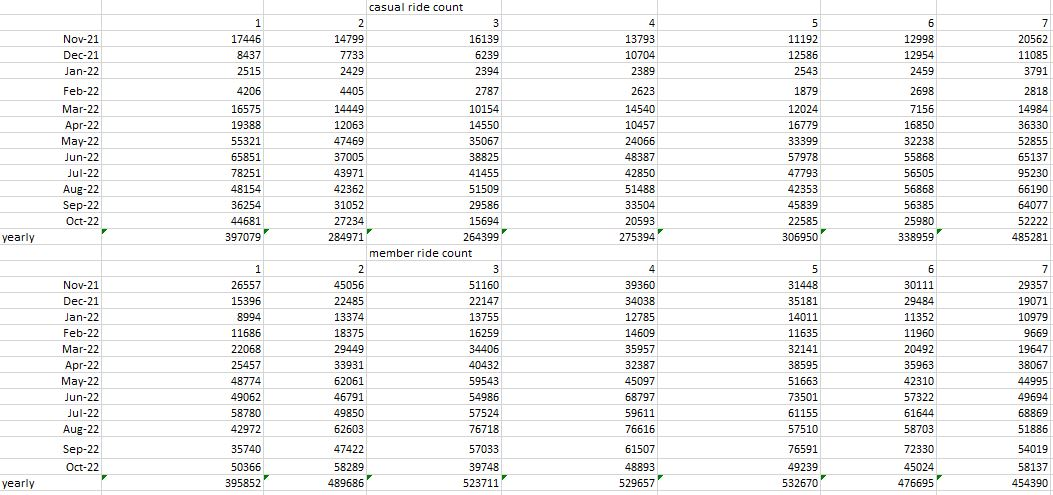


Made a table for average ride length of casuals and members throughout the year for each month and then summarizing into a yearly overview


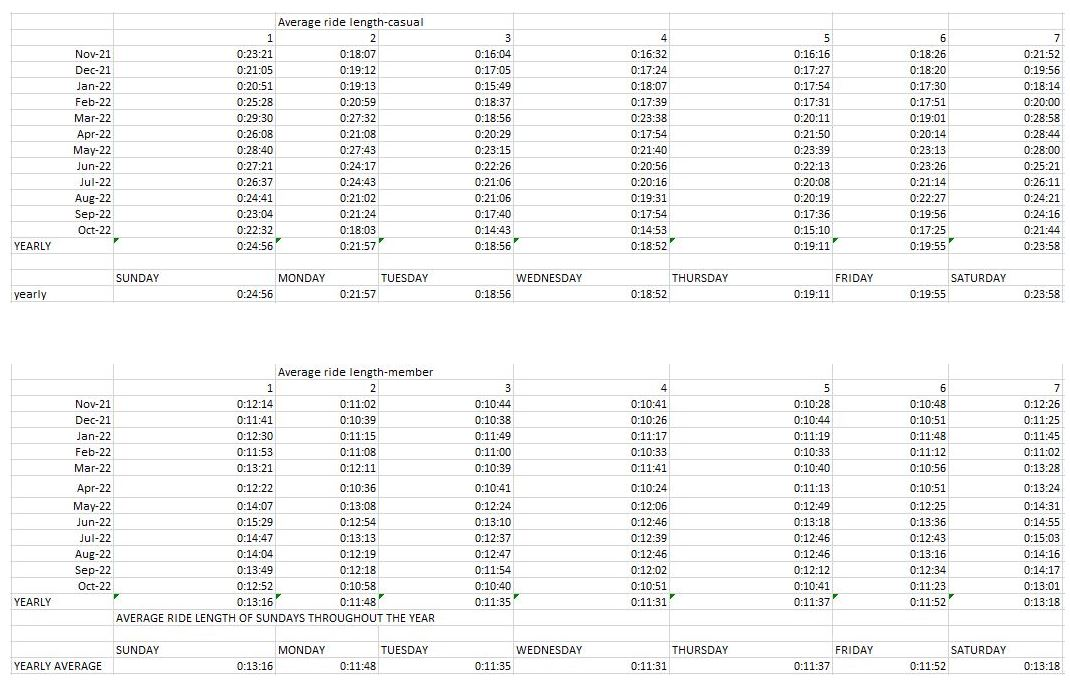

## R Markdown
To get a yearly overview first data of 12 months is combined into one csv file.


In [ ]:
```{r}
#combining csv files of 12 months into one yearly data sheet
library(data.table)
setwd("../input/final_files")
files <- list.files(pattern = '.csv')
temp <- lapply(files,fread, sep =",")
data <- rbind(temp)
write.csv(data,file ="yearly.csv", row.names = FALSE)
```


### Reading the new csv file

In [ ]:
```{r}
#	reading the new csv file
data <- read.csv("../input/final_files/yearly.csv")

```

## Calculated number of classic, electric and docked bikes used by casuals and members

### Calculated the number of electric_bikes used by casuals throughout the year 


In [ ]:
```{r}
#calculating the number of electric_bikes used by casuals throughout the year
electric_bike_count_casual <- data %>%
  filter(member_casual == "casual" & rideable_type == "electric_bike") 
#calculating the number of docked_bikes used by casuals throughout the year
docked_bike_count_casual <- data %>%
  filter(member_casual == "casual" & rideable_type == "docked_bike")
#calculating the number of classic_bikes used by casuals throughout the year
classic_bike_count_casual <- data %>%
  filter(member_casual == "casual" & rideable_type == "classic_bike")
```


### Calculated the number of electric_bikes used by members throughout the year

In [ ]:
```{r}

electric_bike_count_member <- data %>%
  filter(member_casual == "member" & rideable_type == "electric_bike") 
#calculating the number of classic_bikes used by members throughout the year
classic_bike_count_member <- data %>%
  filter(member_casual == "member" & rideable_type == "classic_bike")
#calculating the number of docked_bikes used by members throughout the year
docked_bike_count_member <- data %>%
  filter(member_casual == "member" & rideable_type == "docked_bike")

```

### Calculated the count of start stations used by casuals

In [ ]:
```{r}

start_station_names <- data %>%
  filter(member_casual == "casual")%>%
  arrange(start_station_name)
start_station_names_list <- subset(start_station_names, select = c("start_station_name", "member_casual"))
#write.csv(start_station_names_list, file="C:/Users/HeavenMarts.com/Desktop/final_files/startstation.csv", row.names = FALSE)
start_station_final <- na.omit(start_station_names_list)
write.csv(start_station_final, file="../input/startstation.csv", row.names = FALSE)
# start_station_final %>%
#   count(start_station_name)
options(max.print = 2000)
start_station_list <- start_station_final %>%
  count(start_station_name)
write.csv(start_station_list,file="../input/startstation.csv", row.names = FALSE)

```

## Calculated the count of start stations used by members

In [ ]:
```{r}

start_station_names_members <- data %>%
   filter(member_casual == "member")%>%
   arrange(start_station_name)
  startstation_members_list <- subset(start_station_names_members, select = c("start_station_name", "member_casual"))
  start_station_members_list_final <- startstation_members_list  %>%
    count(start_station_name)
 write.csv(start_station_members_list_final,file="../input/startstation_members.csv", row.names = FALSE)
```

## Calculated the count of end stations used by casuals

In [ ]:
```{r}

end_station_names_casual <- data %>%
   filter(member_casual == "casual")%>%
   arrange(end_station_name)
 endstation_casual <- subset(end_station_names_casual, select =c("end_station_name", "member_casual"))
 endstationcasual_final <- endstation_casual  %>%
       count(end_station_name)
 write.csv(endstationcasual_final,file="../input/endstation_casual.csv", row.names = FALSE)
```

## Calculated the count of end stations used by members

In [ ]:
```{r}

end_station_names_member <- data %>%
   filter(member_casual == "member")%>%
   arrange(end_station_name)
 endstation_member <- subset(end_station_names_member, select =c("end_station_name", "member_casual"))
 endstationmember_final <- endstation_member  %>%
   count(end_station_name)
 write.csv(endstationmember_final,file="../input/endstation_member.csv", row.names = FALSE)
 
```


After calculating the top start stations and end stations visualizations were created in excel

## Creating plot for start and end coordinates

In [ ]:
```{r pressure, echo=FALSE}
#•	creating map showing coordinates of start and end location of casuals and members
chicago_map <- get_stamenmap(
  bbox = c(left=-88.1824 ,bottom =41.6139 , right=-87.2692 , top=42.0549),
  maptype="terrain",
  zoom= 11
)
ggmap(chicago_map)
#making a map visualization showing start coordinates of members and casuals
ggmap(chicago_map)+
  geom_point(data = cycledata,
             aes(x=start_lng, y = start_lat, color=member_casual),
             size=0.2)+
  scale_colour_manual(values = c("orange", "blue", "red"))
#making a map visualization showing end coordinates of members and casuals
ggmap(chicago_map)
ggmap(chicago_map)
ggmap(chicago_map)+
  geom_point(data = cycledata,
             aes(x=end_lng, y = end_lat, color=member_casual),
             size=0.2)+
  scale_colour_manual(values = c("orange", "blue", "red"))
 
```


# Share

Used the data to make basic visualizations in excel and R
Members of cyclistic company are 41% whereas casuals are 59%. Therefore casuals are also a major portion


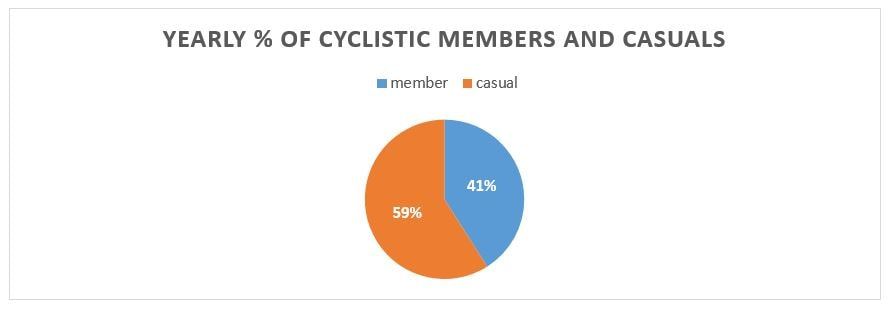

Average length of casuals is more than members. Average length of casuals is between 15-30min whereas average ride length of members is between 10-15 min

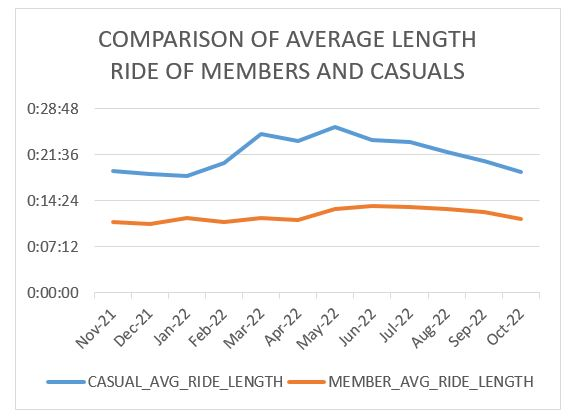

Casuals tend to use the electric bikes the most and the percentage of electric bike is more than 50%. The rest of the portoion is made of 38% classic bikes and 8%docked bikes. Members use classic and electric bikes in almost the same ratio. However members don’t use docked bikes at all.

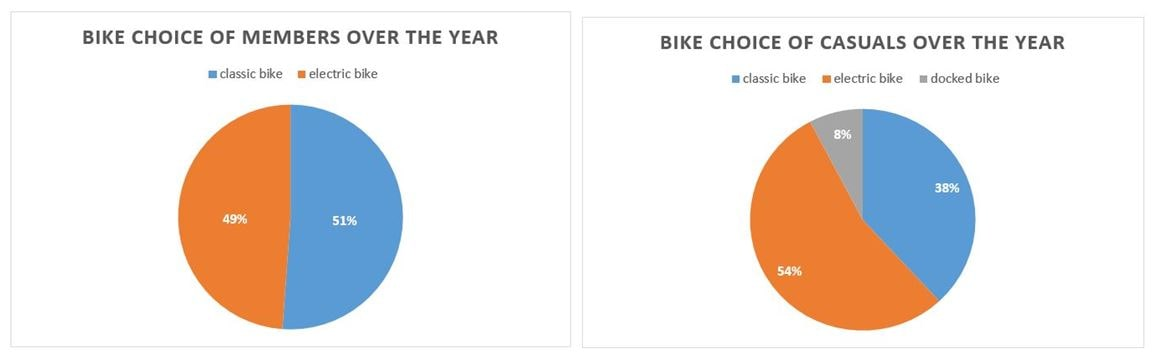

Casuals tend to use bikes for a longer duration on weekends and in weekdays the average ride length is comparatively low. Members ride duration is almost similar throughout the whole week. There is a slight increase on weekends but only by 2-3 minutes.

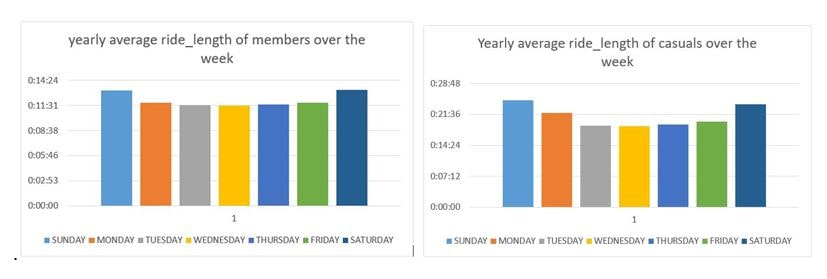

Members use the bikes at 7-8 am whereas casuals have a very less percentage of users at that time. Casual’s peak activity is after 11am-8pm
For members the peak end hours are between 3pm-7pm. Casuals have high end hours between 11am-8pm.
The peak start time of 7-8am and end hours of 3-7pm indicate a huge portion of members use bike for commuting to work. For casuals their usage is more for leisure purposes. There is minimum activity before 12pm.Peak start and end hours of casuals fall in range of 11am-8pm.


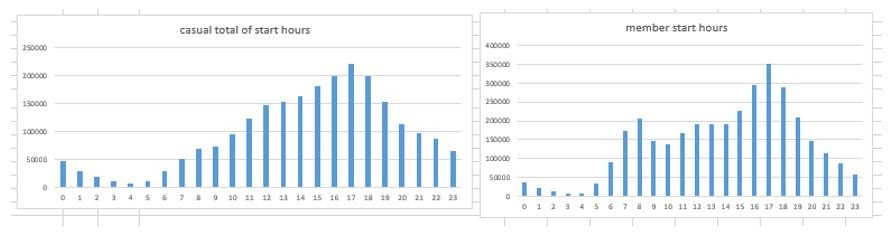

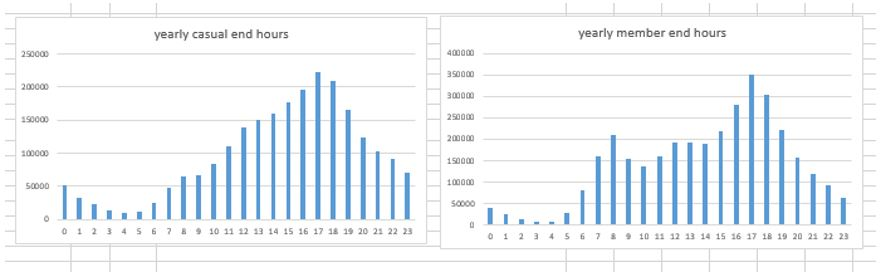


Members have almost the same percentage of usage in the weekdays. Most likely as many members use bike for commuting to work.
Casuals have high usage on weekends.


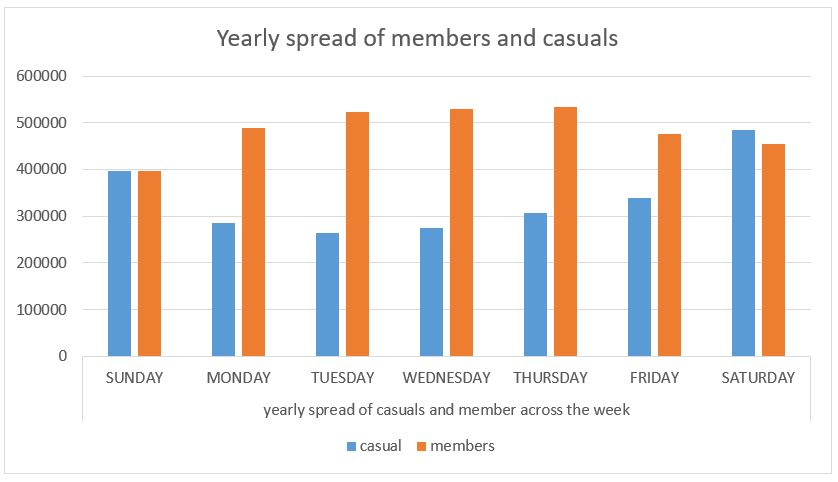

Activity is low in winter months whereas activity is higher in summer months

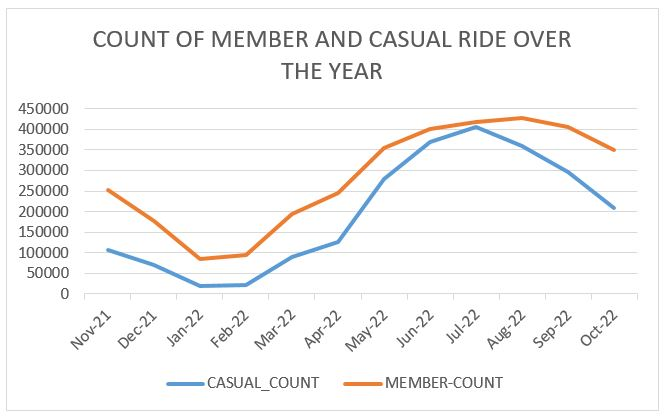

Casuals start and end coordinates are near the tourist’s locations and cultural spots. Members are spread throughout Chicago.

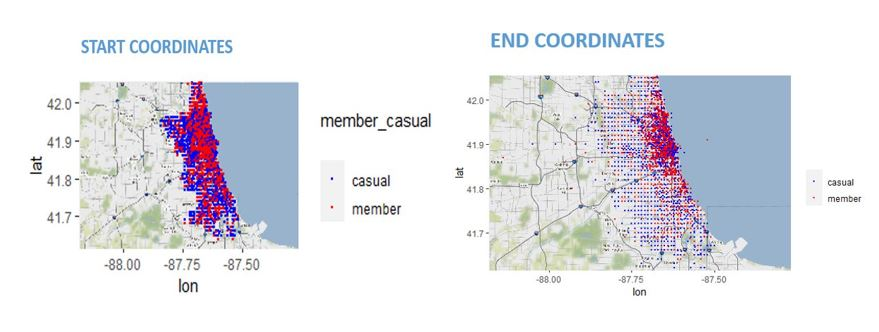

Start and end stations used by casuals are quite different than members.
Stations used by casuals are near tourist and cultural attractions like planetariums, aquariums, parks, theaters and harbor etc.
Stations used by members are routes that are used that people use commonly for commuting for work and studies.


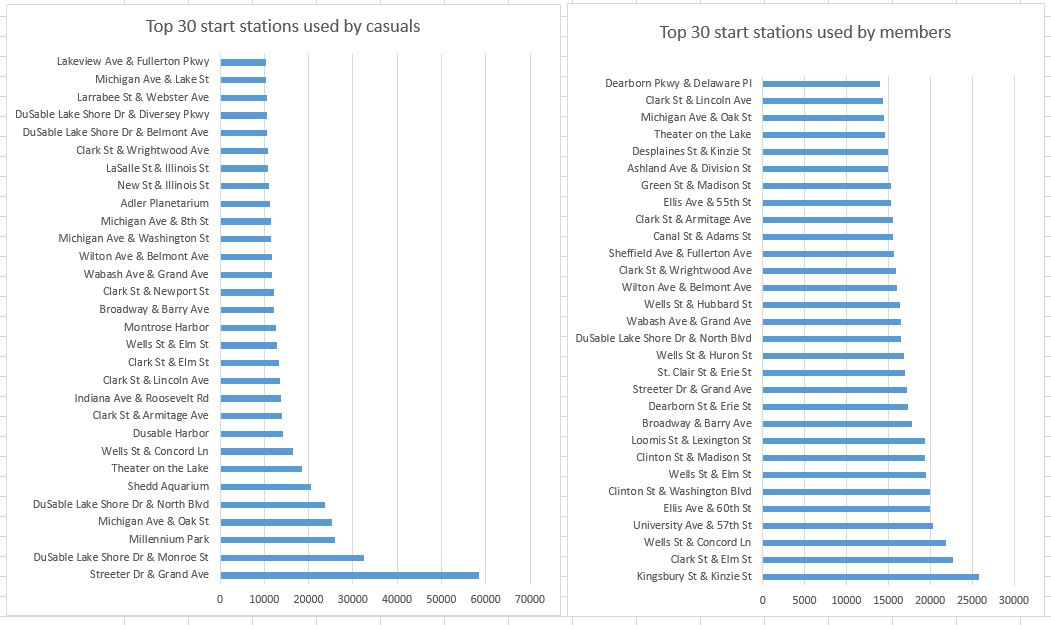

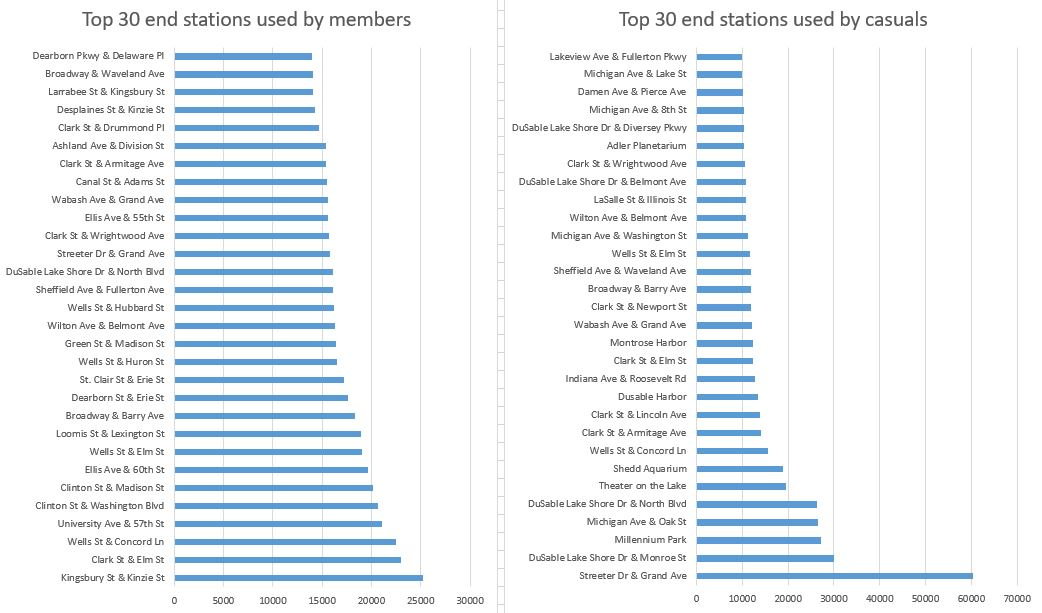

Check my presentation at: <https://docs.google.com/presentation/d/e/2PACX-1vSVZvqSUfTjD8q3Avue4drbIJDN5FuTj2I7IoZX90rXEGBUAMF5yR3IW5PqBgLEWA/pub?start=false&loop=false&delayms=3000>.

# Act
## insights
* Members are 41% whereas casuals are 59%. 
* Average length of casuals is between 15-30min whereas average ride length of member is between 10-15 min
* 54% Casuals tend to use the electric bikes, 38% use classic bikes and 8% use docked bikes. Members use classic and electric bikes in almost the same ratio and don’t use docked bikes at all
* Activity is low in winter months whereas activity is higher in summer months
* Casuals tend to use bikes for a longer duration on weekends.Members ride duration is almost similar throughout the whole week. 
* For casuals both top stations and coordinates are near the tourist locations and cultural spots. Members are spread throughout Chicago and use routes that are used that people use commonly for commuting for work and studies.
* The peak start time of 7-8am and end hours of 3-7pm  for members indicate a huge portion of members use bike for commuting to work. For casuals their usage is more for leisure purposes. There is minimum activity before 12pm.. Peak start and end hours fall in range of 11am-8pm.
* Members have almost the same percentage of usage in the weekdays. Most likely as many members use bike for commuting to work. Casuals have high usage on weekends.

## Why would casual riders buy Cyclistic annual memberships? 
* Casuals should be offered discounts for weekends as more casuals use bikes on weekends
* Casuals should be offered discounts for longer rides since they have a greater average ride length compared to members
* Discount should be offered for visiting tourist places since casuals tend to use bikes more for leisure and tour purposes.
* Casuals should be given discount for joining membership plan. This can help attract casuals to join membership
* Different membership plans should be introduced so casuals can sign up for the one that suits them more
* Offer free minutes for e.g. free 30 min ride for every month for membership plans. 
## How can Cyclistic use digital media to influence casual riders to become members?
* Emails should be sent to casuals to inform them about benefits of membership plans
* Ads should be placed on popular websites and social media platforms
* Ads containing QR code should be placed
* Company’s website and social media channels should promote membership plans and should add more pricing plans.
## Marketing through other ways
* Brochures, pamphlets and advertisement on bill boards, bus stops, tourists places, should be done to provide information about incentives of membership plan
* Marketing should be done near tourist areas as casuals mainly use the bikes near tourist attractions
* Marketing should also be done near the most common stations used by casuals

## When should marketing campaigns begin?
Campaigning should be done in summers during the months of March-Oct as the activity of all bikers is high during that time.

Moreno and her team should now come up with the marketing plan and campaigns according to the insights from the data analysis.

